# IMPORTING DEPENDENCIES

In [1]:
#Dependencies for DBSCAN and Hierarchical clustering
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# LOAD THE DATASET

In [2]:
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-dataset


In [3]:
csv_path = path + "/Housing.csv"
house_price = pd.read_csv(csv_path)

# EDA

In [4]:
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
house_price.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
house_price.shape

(545, 13)

# DATA PREPROCESSING

In [8]:
numerical_cols = house_price.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = house_price.select_dtypes(include=['object']).columns

In [9]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

In [12]:
#Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, categorical_cols),
        ('num', scaler, numerical_cols)
    ])

In [13]:
# Prepare Feature Matrix for clustering
X = preprocessor.fit_transform(house_price)

# DBSCAN

In [17]:
print("\n--- DBSCAN ---")
dbscan = DBSCAN(eps=2.5, min_samples=3)
db_labels = dbscan.fit_predict(X)
house_price['dbscan_cluster'] = db_labels
print(house_price[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'dbscan_cluster']])


--- DBSCAN ---
     area  bedrooms  bathrooms  stories  parking  dbscan_cluster
0    7420         4          2        3        2              -1
1    8960         4          4        4        3              -1
2    9960         3          2        2        2              -1
3    7500         4          2        2        3              -1
4    7420         4          1        2        2               0
..    ...       ...        ...      ...      ...             ...
540  3000         2          1        1        2               0
541  2400         3          1        1        0               0
542  3620         2          1        1        0               0
543  2910         3          1        1        0               0
544  3850         3          1        2        0               0

[545 rows x 6 columns]


# HIERARCHICAL CLUSTERING

In [24]:
print("\n--- Hierarchical Clustering---")
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
house_price['hierarchical_cluster'] = hierarchical_labels
print(house_price[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'hierarchical_cluster']])


--- Hierarchical Clustering---
     area  bedrooms  bathrooms  stories  parking  hierarchical_cluster
0    7420         4          2        3        2                     1
1    8960         4          4        4        3                     1
2    9960         3          2        2        2                     1
3    7500         4          2        2        3                     1
4    7420         4          1        2        2                     0
..    ...       ...        ...      ...      ...                   ...
540  3000         2          1        1        2                     2
541  2400         3          1        1        0                     2
542  3620         2          1        1        0                     2
543  2910         3          1        1        0                     2
544  3850         3          1        2        0                     2

[545 rows x 6 columns]


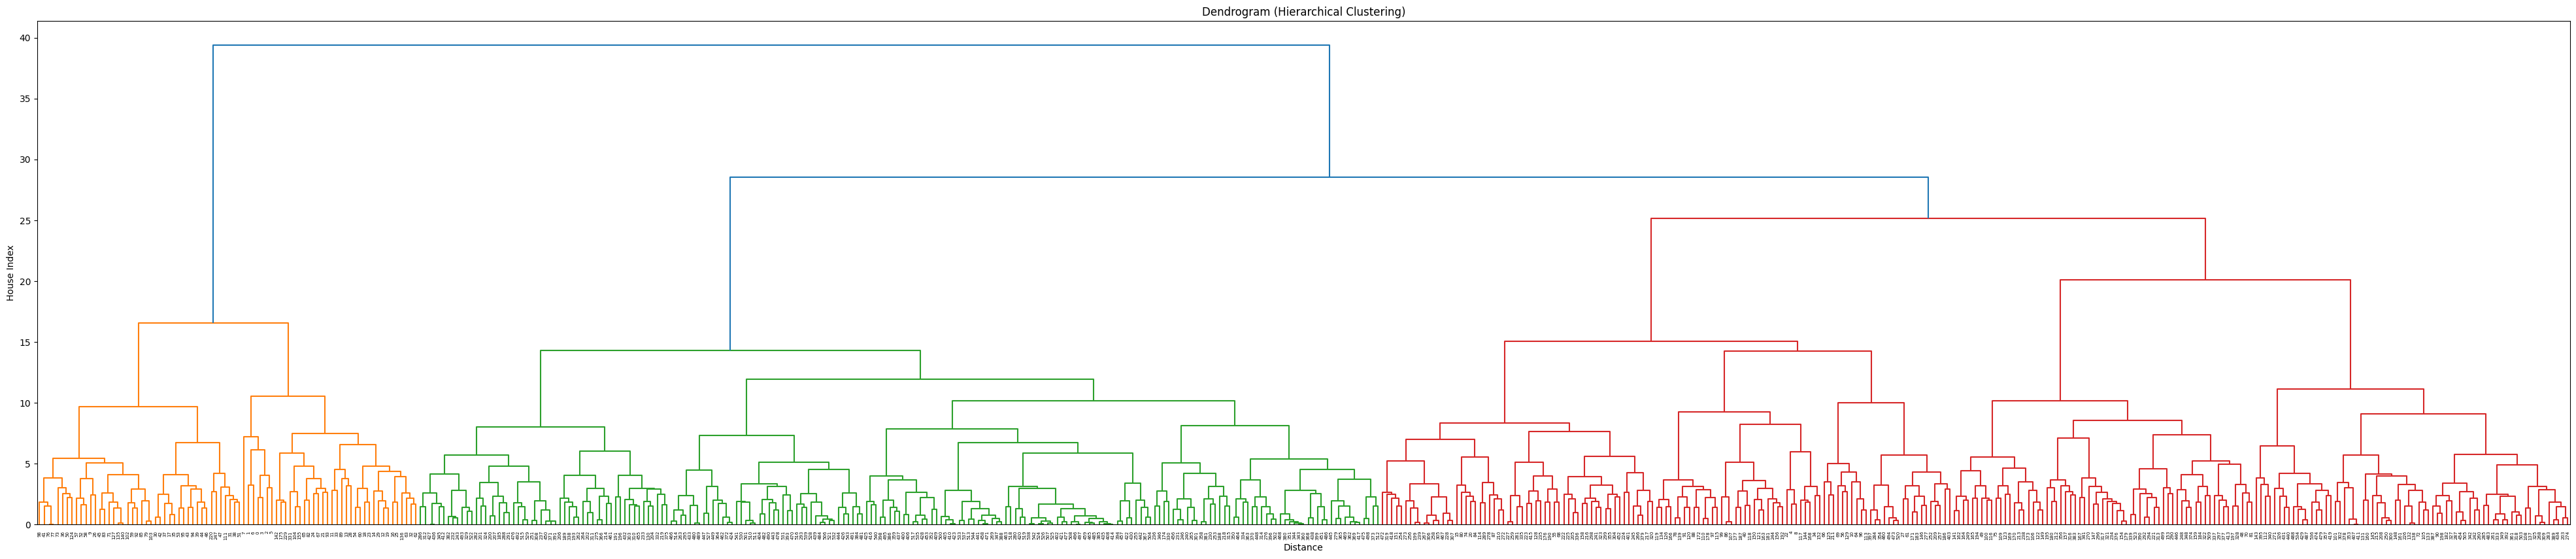

In [27]:
# Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(50, 10))
dendrogram(linked, labels=house_price.index.tolist())
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Distance")
plt.ylabel("House Index")
plt.show()

# CLUSTERING VISUALIZATION

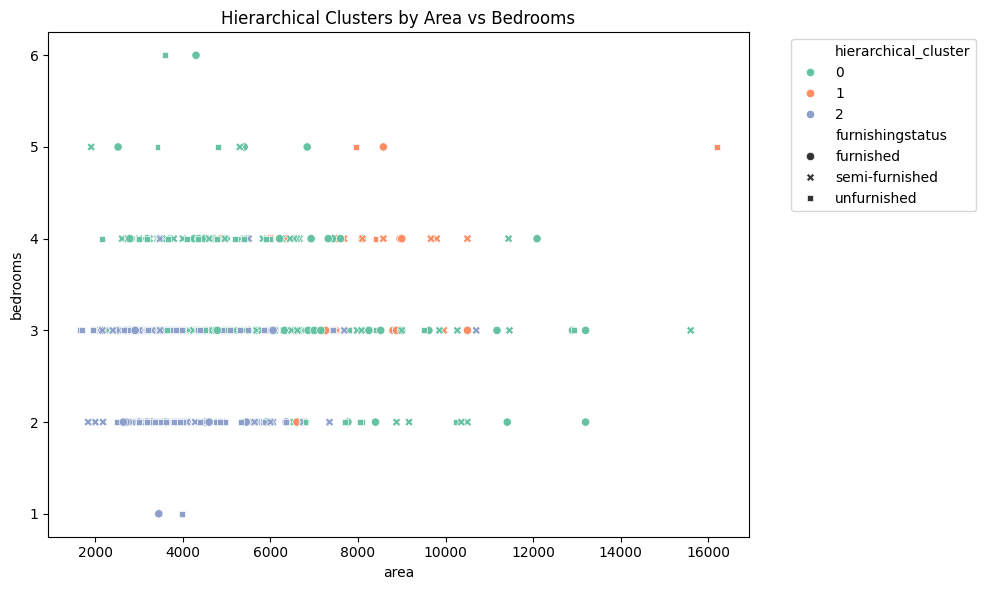

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_price, x='area', y='bedrooms', hue='hierarchical_cluster', style='furnishingstatus', palette='Set2')
plt.title("Hierarchical Clusters by Area vs Bedrooms")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()